<a href="https://colab.research.google.com/github/aigerim1q/Assignment-BT2/blob/main/binary_classification_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining the sentiment of bank reviews using classic machine learning algorithms



In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 41.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Константы

In [ ]:
max_words = 10000
random_state = 42

# Loading and preparing the dataset

In [ ]:
!wget https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1 -O banks.csv

--2025-09-23 09:17:44--  https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nyh951wqn1z1widxpfb95/banks.csv?rlkey=61immj9awxn9ksaynazcavuv8&dl=1 [following]
--2025-09-23 09:17:44--  https://www.dropbox.com/scl/fi/nyh951wqn1z1widxpfb95/banks.csv?rlkey=61immj9awxn9ksaynazcavuv8&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d193e1deacb284928e44b58ea.dl.dropboxusercontent.com/cd/0/inline/Cx66swY_CniwIOYxzbiZxNqI_zYtCF3qc6pATe87KnOUEzpKIcAel0Ev6PuKYgXTQODS8cOOtDBT6r88Gb6fVAqLRutFmFL0PpoO9U_vHFocTLPTVIp5pY9F41BLv2fE-iM/file?dl=1# [following]
--2025-09-23 09:17:44--  https://uc2d193e1deacb284928e44b58ea.dl.dropboxusercontent.com/cd/0/inline/Cx66swY_Cni

In [ ]:
banks = pd.read_csv('banks.csv', sep='\t', index_col='idx');

In [ ]:
banks

,Score,Text
idx,,
0,Positive,В Альфа-Банке работает замечательная девушка -...
1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...
2,Positive,Очень порадовала оперативность работы в банке....
3,Negative,Имела неосторожность оформить потреб. кредит в...
4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...
...,...,...
13994,Positive,"О высокой надёжности МКБ, порядочности и добро..."
13995,Positive,"Обслуживаюсь в офисе на Чернореченской 42а, ка..."
13996,Positive,Попала сегодня в очень неприятную ситуацию. Ре...


In [ ]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [ ]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--']
stop_words = stopwords.words("russian")
morph = pymorphy3.MorphAnalyzer()

In [ ]:
banks['Preprocessed_texts'] = banks.apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

In [ ]:
banks

,Score,Text,Preprocessed_texts
idx,,,
0,Positive,В Альфа-Банке работает замечательная девушка -...,"[альфа-банк, работать, замечательный, девушка,..."
1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...,"[оформлять, рассрочка, м., видео, мег, тёплый,..."
2,Positive,Очень порадовала оперативность работы в банке....,"[очень, порадовать, оперативность, работа, бан..."
3,Negative,Имела неосторожность оформить потреб. кредит в...,"[иметь, неосторожность, оформить, потреба, кре..."
4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...,"[небольшой, предыстория, найти, сайт, mdm, бан..."
...,...,...,...
13994,Positive,"О высокой надёжности МКБ, порядочности и добро...","[высокий, надёжность, мкб, порядочность, добро..."
13995,Positive,"Обслуживаюсь в офисе на Чернореченской 42а, ка...","[обслуживаться, офис, чернореченский, 42а, физ..."
13996,Positive,Попала сегодня в очень неприятную ситуацию. Ре...,"[попасть, сегодня, очень, неприятный, ситуация..."


In [ ]:
words = Counter()

In [ ]:
for txt in banks['Preprocessed_texts']:
    words.update(txt)

In [ ]:
# Словарь, отображающий слова в коды
word_to_index = dict()
# Словарь, отображающий коды в слова
index_to_word = dict()

We create dictionaries

In [ ]:
for i, word in enumerate(words.most_common(max_words - 2)):
    word_to_index[word[0]] = i + 2
    index_to_word[i + 2] = word[0]

Function to convert a list of words to a list of codes

In [ ]:
def text_to_sequence(txt, word_to_index):
    seq = []
    for word in txt:
        index = word_to_index.get(word, 1)
        if index != 1:
            seq.append(index)
    return seq

We transform all texts into a sequence of word codes

In [ ]:
banks['Sequences'] = banks.apply(lambda row: text_to_sequence(row['Preprocessed_texts'], word_to_index), axis=1)

In [ ]:
banks

,Score,Text,Preprocessed_texts,Sequences
idx,,,,
0,Positive,В Альфа-Банке работает замечательная девушка -...,"[альфа-банк, работать, замечательный, девушка,...","[62, 43, 916, 78, 204, 1867, 357, 2710, 409, 1..."
1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...,"[оформлять, рассрочка, м., видео, мег, тёплый,...","[267, 855, 1178, 3214, 3891, 2981, 7345, 171, ..."
2,Positive,Очень порадовала оперативность работы в банке....,"[очень, порадовать, оперативность, работа, бан...","[18, 1055, 910, 29, 2, 475, 183, 3, 628, 1768,..."
3,Negative,Имела неосторожность оформить потреб. кредит в...,"[иметь, неосторожность, оформить, потреба, кре...","[118, 4817, 72, 2368, 9, 62, 18, 2664, 1287, 3..."
4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...,"[небольшой, предыстория, найти, сайт, mdm, бан...","[418, 3850, 275, 87, 2, 648, 3, 4893, 2, 296, ..."
...,...,...,...,...
13994,Positive,"О высокой надёжности МКБ, порядочности и добро...","[высокий, надёжность, мкб, порядочность, добро...","[401, 2321, 809, 5027, 8157, 7, 3098, 126, 441..."
13995,Positive,"Обслуживаюсь в офисе на Чернореченской 42а, ка...","[обслуживаться, офис, чернореченский, 42а, физ...","[362, 24, 9494, 2151, 201, 14, 24, 95, 141, 66..."
13996,Positive,Попала сегодня в очень неприятную ситуацию. Ре...,"[попасть, сегодня, очень, неприятный, ситуация...","[517, 109, 18, 992, 53, 38, 224, 233, 3, 46, 3..."


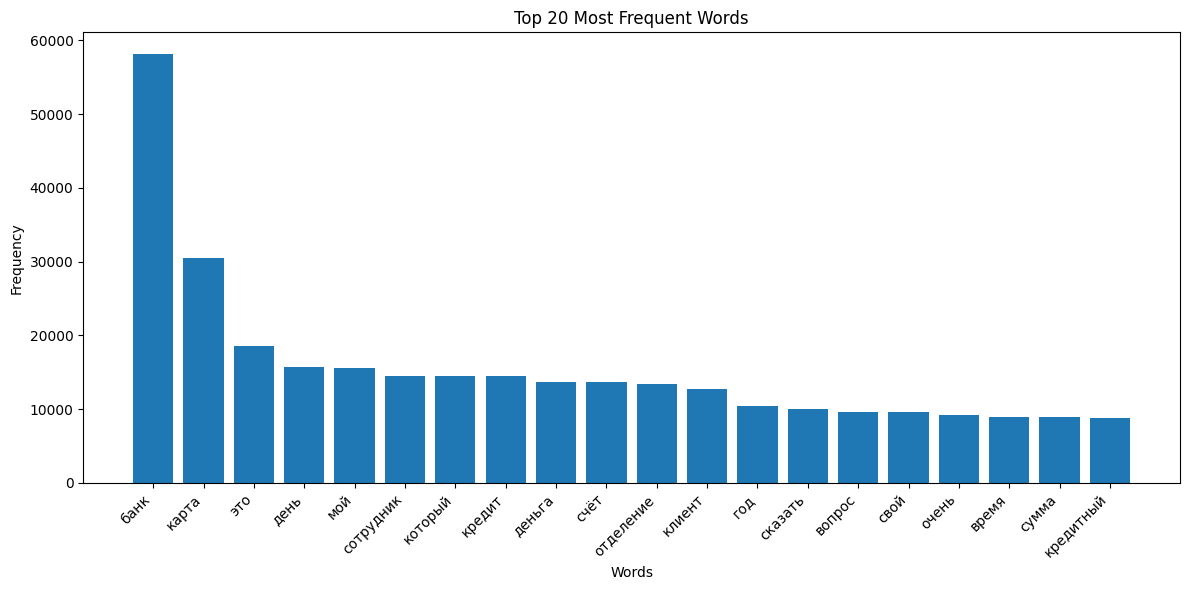

In [ ]:
import matplotlib.pyplot as plt

# Get the 20 most common words and their frequencies
top_20_words = words.most_common(20)

# Extract words and frequencies for plotting
word_labels = [word[0] for word in top_20_words]
word_frequencies = [word[1] for word in top_20_words]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(word_labels, word_frequencies)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Preparing data for training

Convert text class labels to numeric ones

In [ ]:
mapping = {'Negative': 0, 'Positive': 1}

In [ ]:
banks.replace({'Score': mapping}, inplace=True)

/tmp/ipython-input-1087490519.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banks.replace({'Score': mapping}, inplace=True)


In [ ]:
banks

,Score,Text,Preprocessed_texts,Sequences
idx,,,,
0,1,В Альфа-Банке работает замечательная девушка -...,"[альфа-банк, работать, замечательный, девушка,...","[62, 43, 916, 78, 204, 1867, 357, 2710, 409, 1..."
1,0,Оформляя рассрочку в м. Видео в меге тёплый ст...,"[оформлять, рассрочка, м., видео, мег, тёплый,...","[267, 855, 1178, 3214, 3891, 2981, 7345, 171, ..."
2,1,Очень порадовала оперативность работы в банке....,"[очень, порадовать, оперативность, работа, бан...","[18, 1055, 910, 29, 2, 475, 183, 3, 628, 1768,..."
3,0,Имела неосторожность оформить потреб. кредит в...,"[иметь, неосторожность, оформить, потреба, кре...","[118, 4817, 72, 2368, 9, 62, 18, 2664, 1287, 3..."
4,0,Небольшая предыстория: Нашел на сайте MDM банк...,"[небольшой, предыстория, найти, сайт, mdm, бан...","[418, 3850, 275, 87, 2, 648, 3, 4893, 2, 296, ..."
...,...,...,...,...
13994,1,"О высокой надёжности МКБ, порядочности и добро...","[высокий, надёжность, мкб, порядочность, добро...","[401, 2321, 809, 5027, 8157, 7, 3098, 126, 441..."
13995,1,"Обслуживаюсь в офисе на Чернореченской 42а, ка...","[обслуживаться, офис, чернореченский, 42а, физ...","[362, 24, 9494, 2151, 201, 14, 24, 95, 141, 66..."
13996,1,Попала сегодня в очень неприятную ситуацию. Ре...,"[попасть, сегодня, очень, неприятный, ситуация...","[517, 109, 18, 992, 53, 38, 224, 233, 3, 46, 3..."


### Selecting data for training and testing

In [ ]:
train, test = train_test_split(banks, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train

,Score,Text,Preprocessed_texts,Sequences
idx,,,,
13677,0,"Меня, думаю, как и многих клиентов Альфа-Банка...","[думать, многий, клиент, альфа-банк, постоянно...","[157, 803, 13, 62, 505, 6196, 182, 3144, 302, ..."
10437,1,Здравствуйте! Являюсь клиентом Альфа-Банка бол...,"[здравствуйте, являться, клиент, альфа-банк, г...","[525, 86, 13, 62, 14, 2505, 203, 1101, 392, 17..."
7184,1,С 2008 года являюсь клиентом ситибанка по зарп...,"[2008, год, являться, клиент, ситибанк, зарпла...","[1298, 14, 86, 13, 968, 602, 215, 1089, 460, 1..."
6669,1,Моя история с Ипотечным кредитом начиналось с ...,"[история, ипотечный, кредит, начинаться, обращ...","[169, 547, 9, 1371, 117, 82, 2, 269, 207, 63, ..."
7898,1,Хочу выразить благодарность сотрудникам МТС Ба...,"[хотеть, выразить, благодарность, сотрудник, м...","[39, 472, 283, 7, 2019, 2, 913, 96, 16, 1593, ..."
...,...,...,...,...
9132,0,В мае этого года оформлял в ПриватБанке расчёт...,"[май, год, оформлять, приватбанк, расчётный, с...","[433, 14, 267, 1318, 555, 11, 291, 2388, 2677,..."
3828,1,Спасибо руководству банка за понимание (см. от...,"[спасибо, руководство, банк, понимание, смотре...","[75, 448, 2, 905, 542, 93, 1098, 6991, 5670, 2..."
7133,1,Я ещё раз убеждаюсь лучше Сбербанка нет другог...,"[ещё, убеждаться, сбербанк, другой, банк, спас...","[230, 4398, 143, 48, 2, 75, 176, 143, 444, 38,..."


In [ ]:
test

,Score,Text,Preprocessed_texts,Sequences
idx,,,,
3791,0,"Сотрудничаю с банком с 2009 года, когда и была...","[сотрудничать, банк, 2009, год, выпустить, кре...","[1246, 2, 1375, 14, 570, 21, 3, 1093, 25, 19, ..."
12237,0,Здравствуйте! Хотелось поведать об отвратитель...,"[здравствуйте, хотеться, поведать, отвратитель...","[525, 191, 3943, 1510, 29, 286, 3647, 304, 549..."
7588,0,Год назад взяла кредит на 3 года. Не буду гово...,"[год, назад, взять, кредит, 3, год, быть, гово...","[14, 210, 127, 9, 122, 14, 61, 59, 58, 4007, 6..."
9552,1,"Положил деньги в Инвест, на новый вклад Лидер....","[положить, деньга, инвест, новый, вклад, лидер...","[395, 10, 71, 47, 3735, 401, 85, 3097, 1188, 3..."
13458,0,Уже 5 дней я пытаюсь получить выписку по счету...,"[5, день, пытаться, получить, выписка, счёт, н...","[119, 5, 280, 23, 255, 11, 520, 85, 9, 68, 354..."
...,...,...,...,...
5566,0,"Миллион раз я пожалела, что оформила ипотеку в...","[миллион, пожалеть, оформить, ипотека, банк, о...","[2291, 2006, 72, 453, 2, 193, 681, 505, 159, 2..."
12314,0,"Мой клиент, предприниматель, лишился более 8 м...","[клиент, предприниматель, лишиться, 8, миллион...","[13, 2350, 4567, 484, 2291, 54, 1843, 251, 47,..."
6486,1,"Возможно неуместно здесь, НО что творится с ев...","[возможно, неуместно, твориться, евро, доллар,...","[412, 3495, 601, 617, 1340, 397, 7195, 105, 54..."


### Separating class labels and training data

Data for training

In [ ]:
x_train_seq = train['Sequences']
y_train = train['Score']

In [ ]:
x_train_seq

,Sequences
idx,
13677,"[157, 803, 13, 62, 505, 6196, 182, 3144, 302, ..."
10437,"[525, 86, 13, 62, 14, 2505, 203, 1101, 392, 17..."
7184,"[1298, 14, 86, 13, 968, 602, 215, 1089, 460, 1..."
6669,"[169, 547, 9, 1371, 117, 82, 2, 269, 207, 63, ..."
7898,"[39, 472, 283, 7, 2019, 2, 913, 96, 16, 1593, ..."
...,...
9132,"[433, 14, 267, 1318, 555, 11, 291, 2388, 2677,..."
3828,"[75, 448, 2, 905, 542, 93, 1098, 6991, 5670, 2..."
7133,"[230, 4398, 143, 48, 2, 75, 176, 143, 444, 38,..."


In [ ]:
y_train

,Score
idx,
13677,0
10437,1
7184,1
6669,1
7898,1
...,...
9132,0
3828,1
7133,1


Data for testing

In [ ]:
x_test_seq = test['Sequences']
y_test = test['Score']

In [ ]:
x_test_seq

,Sequences
idx,
3791,"[1246, 2, 1375, 14, 570, 21, 3, 1093, 25, 19, ..."
12237,"[525, 191, 3943, 1510, 29, 286, 3647, 304, 549..."
7588,"[14, 210, 127, 9, 122, 14, 61, 59, 58, 4007, 6..."
9552,"[395, 10, 71, 47, 3735, 401, 85, 3097, 1188, 3..."
13458,"[119, 5, 280, 23, 255, 11, 520, 85, 9, 68, 354..."
...,...
5566,"[2291, 2006, 72, 453, 2, 193, 681, 505, 159, 2..."
12314,"[13, 2350, 4567, 484, 2291, 54, 1843, 251, 47,..."
6486,"[412, 3495, 601, 617, 1340, 397, 7195, 105, 54..."


In [ ]:
y_test

,Score
idx,
3791,0
12237,0
7588,0
9552,1
13458,0
...,...
5566,0
12314,0
6486,1


## Create a bag of words

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] += 1.
    return results

In [ ]:
x_train = vectorize_sequences(x_train_seq, max_words)

In [ ]:
x_test = vectorize_sequences(x_test_seq, max_words)

In [ ]:
x_train[0][:100]

array([ 0.,  0.,  2., 13.,  4.,  1.,  2.,  0.,  1.,  2.,  1.,  0.,  0.,
        1.,  2.,  1.,  0.,  2.,  0.,  0.,  2.,  5.,  0.,  1.,  0.,  1.,
        0.,  2.,  3.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,
        0.,  2.,  0.,  2.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  4.,  0.,  1.,  0.,  2.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
len(x_train[0])

10000

## Creating a Machine Learning Model

In [ ]:
lr = LogisticRegression(random_state=random_state, max_iter=500)

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [ ]:
SV = SVC(kernel='linear', C=1.0, random_state=4)

## Training a Machine Learning Model

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
SV.fit(x_train, y_train)

SVC(kernel='linear', random_state=4)

## Evaluating the quality of training on the test dataset

We determine the proportion of correct answers (accuracy) on the test data set

In [ ]:
lr.score(x_test, y_test)

0.9471428571428572

In [ ]:
DT.score(x_test,y_test)

0.7628571428571429

In [ ]:
SV.score(x_test,y_test)

0.9407142857142857

In [ ]:
import matplotlib.pyplot as plt

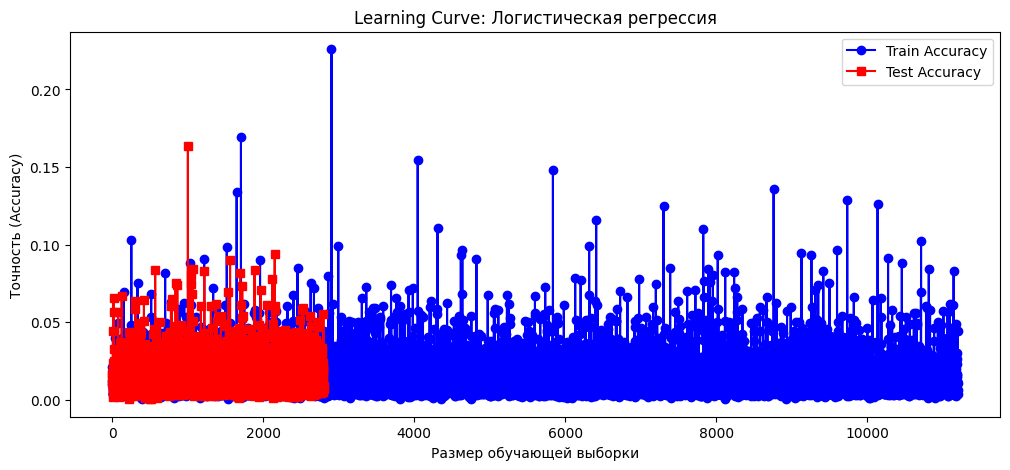

In [ ]:
train_mean = np.mean(x_train, axis=1)
test_mean = np.mean(x_test, axis=1)

plt.figure(figsize=(12, 5))

plt.plot( train_mean, label="Train Accuracy", marker='o', color="blue")
plt.plot( test_mean, label="Test Accuracy", marker='s', color="red")

plt.xlabel("Размер обучающей выборки")
plt.ylabel("Точность (Accuracy)")
plt.title("Learning Curve: Логистическая регрессия")
plt.legend()

plt.show()

## We apply the model to determine the sentiment of a bank review

**Positive review**

In [ ]:
positive_text = """Брал кредит в Мегабанке на автомобиль. Выдали за один день. Никаких скрытых комиссий и переплат.
У банка удобное мобильное приложение, через которое можно быстро отправить ежемесячный платеж.
Досрочное гасить начал через три месяца. Я доволен оперативностью и удобством. Огромное спасибо!
"""

Preparing text for processing

In [ ]:
positive_preprocessed_text = preprocess(positive_text, stop_words, punctuation_marks, morph)

In [ ]:
positive_preprocessed_text

['брать',
 'кредит',
 'мегабанк',
 'автомобиль',
 'выдать',
 'день',
 'никакой',
 'скрытый',
 'комиссия',
 'переплата',
 'банк',
 'удобный',
 'мобильный',
 'приложение',
 'который',
 'быстро',
 'отправить',
 'ежемесячный',
 'платёж',
 'досрочный',
 'гасить',
 'начать',
 'месяц',
 'довольный',
 'оперативность',
 'удобство',
 'огромный',
 'спасибо']

In [ ]:
positive_seq = text_to_sequence(positive_preprocessed_text, word_to_index)

In [ ]:
positive_seq

[170,
 9,
 963,
 136,
 5,
 81,
 1891,
 80,
 1028,
 2,
 287,
 305,
 763,
 8,
 128,
 205,
 489,
 30,
 358,
 1422,
 279,
 34,
 299,
 910,
 1316,
 312,
 75]

In [ ]:
positive_bow = vectorize_sequences([positive_seq], max_words)

In [ ]:
positive_bow[0][0:100]

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Performing recognition

In [ ]:
result = lr.predict(positive_bow)

In [ ]:
result = DT.predict(positive_bow)

In [ ]:
result

array([1])

**Negative review**

In [ ]:
negative_text = """Взял кредит в ТакСебеБанке на автомобиль. В договор включили обязательный контракт
на помощь на дороге, который мне не нужен. Узнал об этом только во время подписания договора, иначе бы отказался.
Альтернативы была страхование жизни, но мне это даже не предложили. Скорее всего, менеджер продвигает
продажи услуг этой компании в ущерб интересов клиента. Как минимум, непорядочно и непрофессионально.
У банка ужасное мобильное приложение, из-за которого с меня взяли штраф 10 тыс.руб. По требованиям
банка после покупки автомобиля в приложении нужно загрузить ПТС. Я загрузил и проверил, что ПТС в приложении есть.
Но через некоторое время ПТС из приложения пропал и с меня взяли штраф. Никому не рекомендую связываться с ТакСебеБанком.
"""

In [ ]:
negative_preprocessed_text = preprocess(negative_text, stop_words, punctuation_marks, morph)
negative_seq = text_to_sequence(negative_preprocessed_text, word_to_index)
negative_bow = vectorize_sequences([negative_seq], max_words)

In [ ]:
negative_bow[0][0:100]

array([0., 0., 2., 0., 2., 0., 0., 0., 2., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
result = lr.predict(negative_bow)

In [ ]:
result

array([0])

In [ ]:
result = lr.predict_proba(negative_bow)

In [ ]:
result

array([[0.99682114, 0.00317886]])